In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [35]:
df = pd.read_csv("train.csv")

## Data Exploration

In [36]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Cleaning & Transformation

In [37]:
# drop unneccessary columns
columns_to_drop = ["id", "host_id", "calculated_host_listings_count"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# remove duplicates
df.drop_duplicates()

# replace NaN values in 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)


## Data Analysis & Visualization

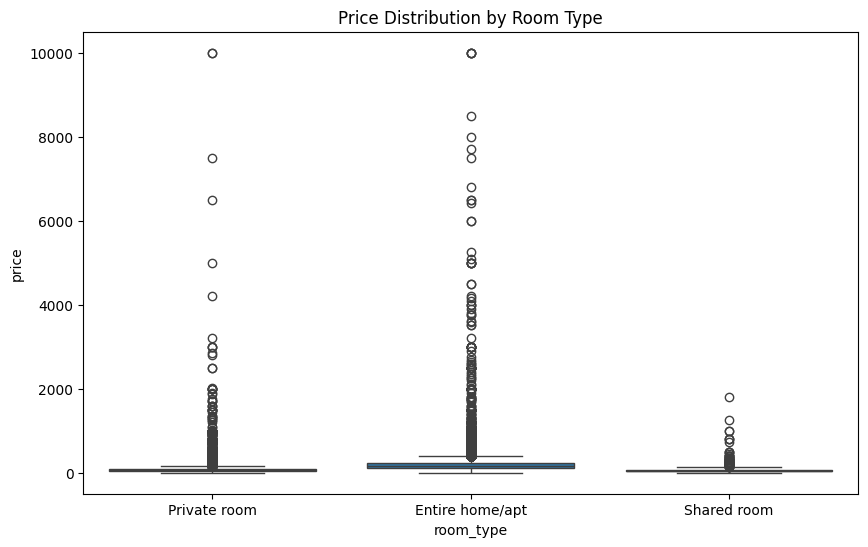

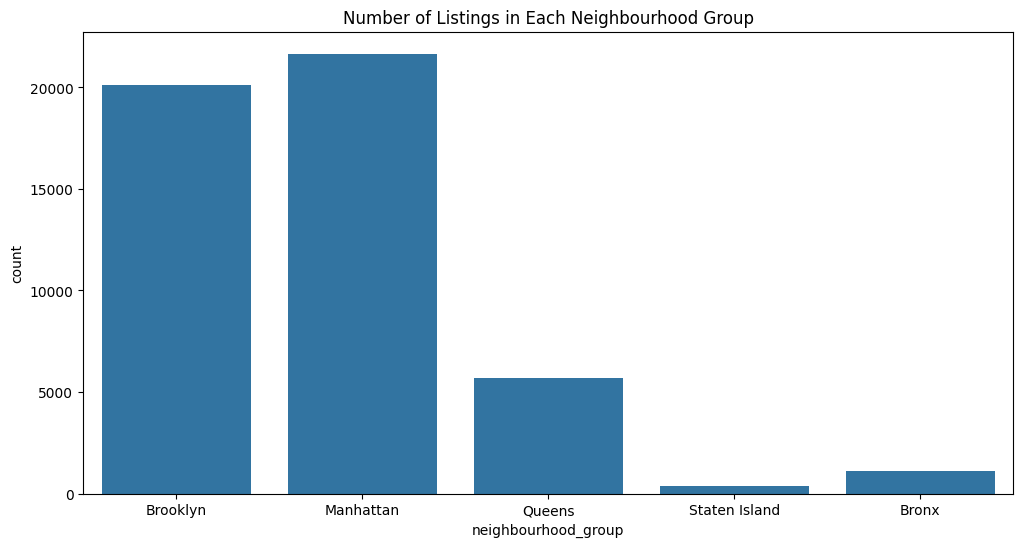

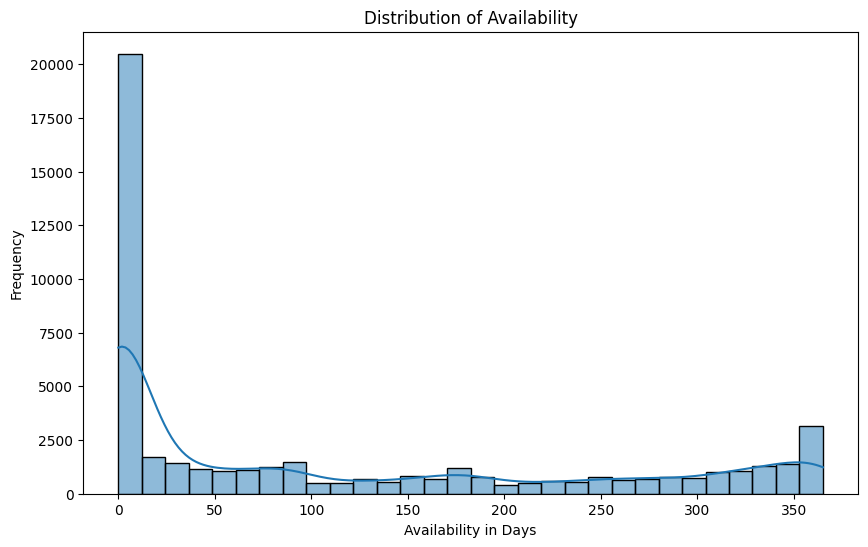

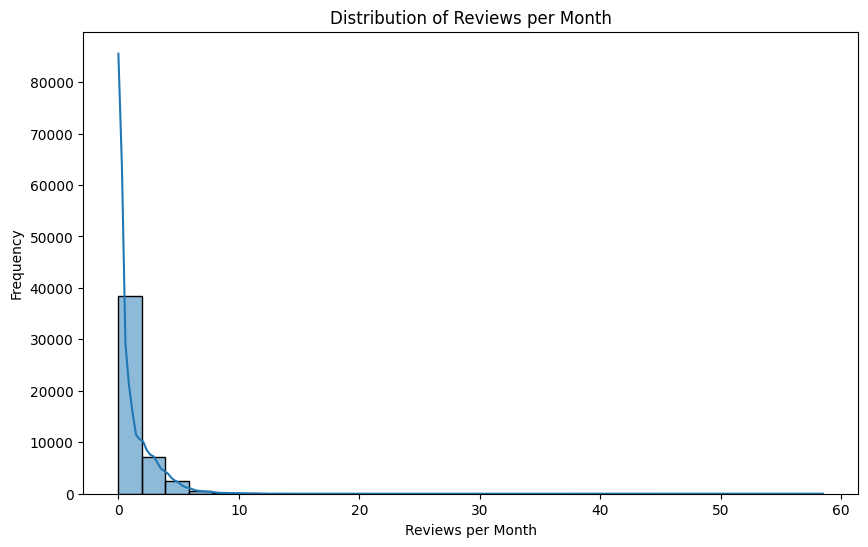

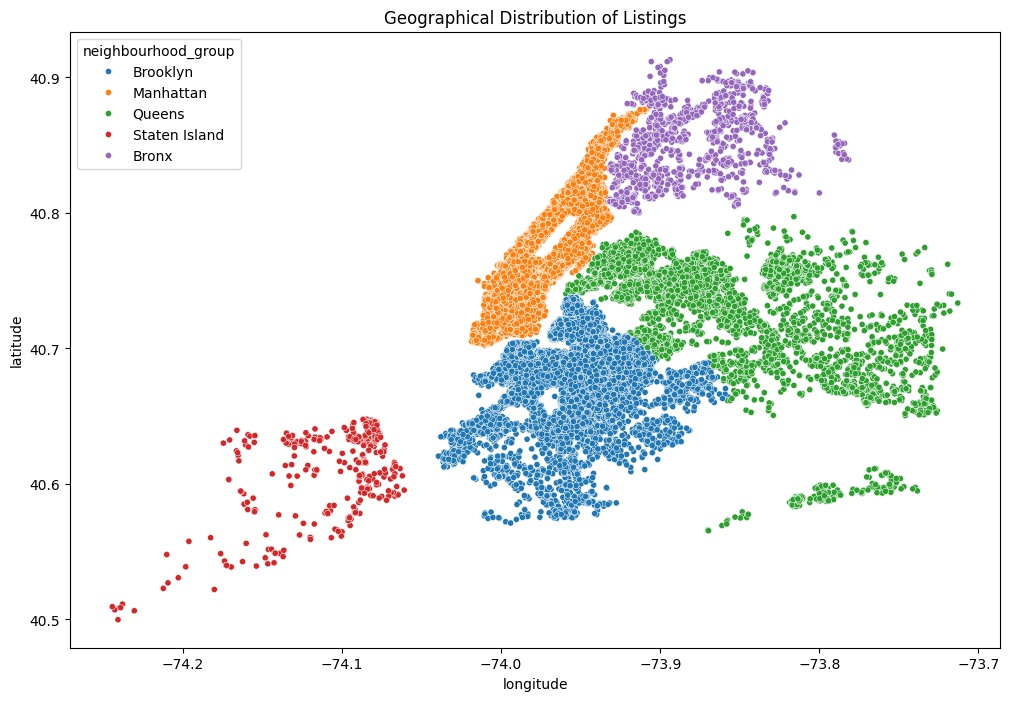

C:\Users\evalt\AppData\Local\Temp\ipykernel_792\1541734068.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, ci=None)


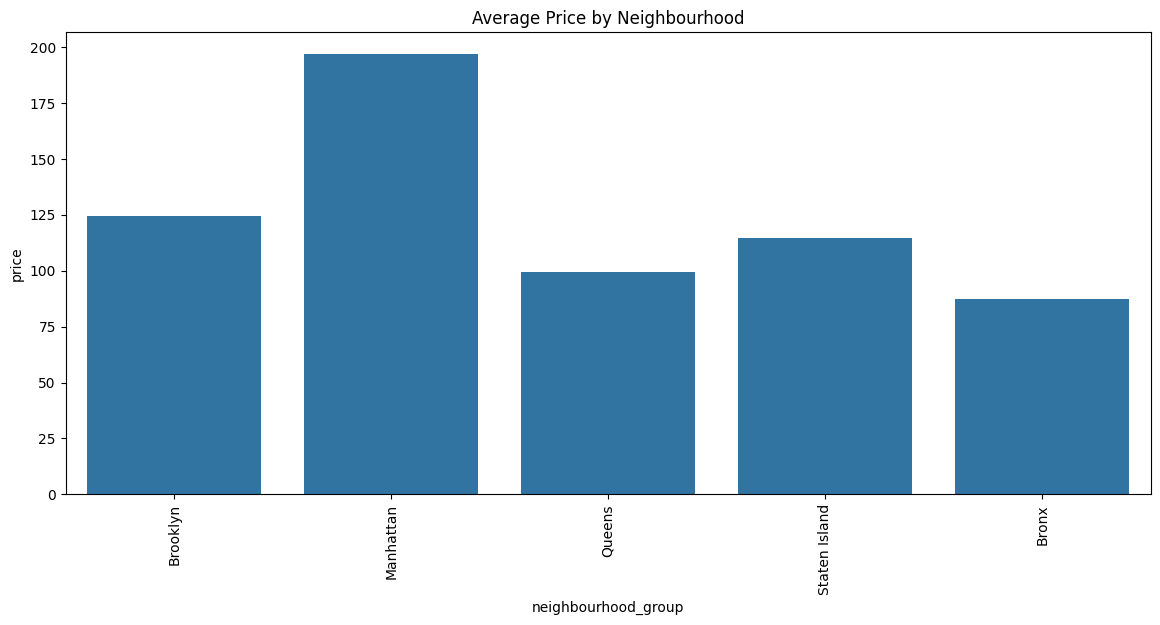

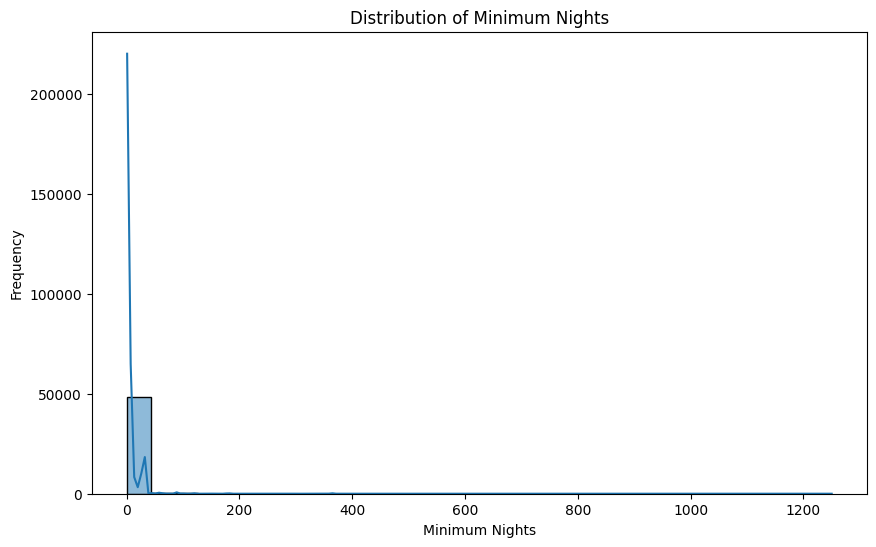

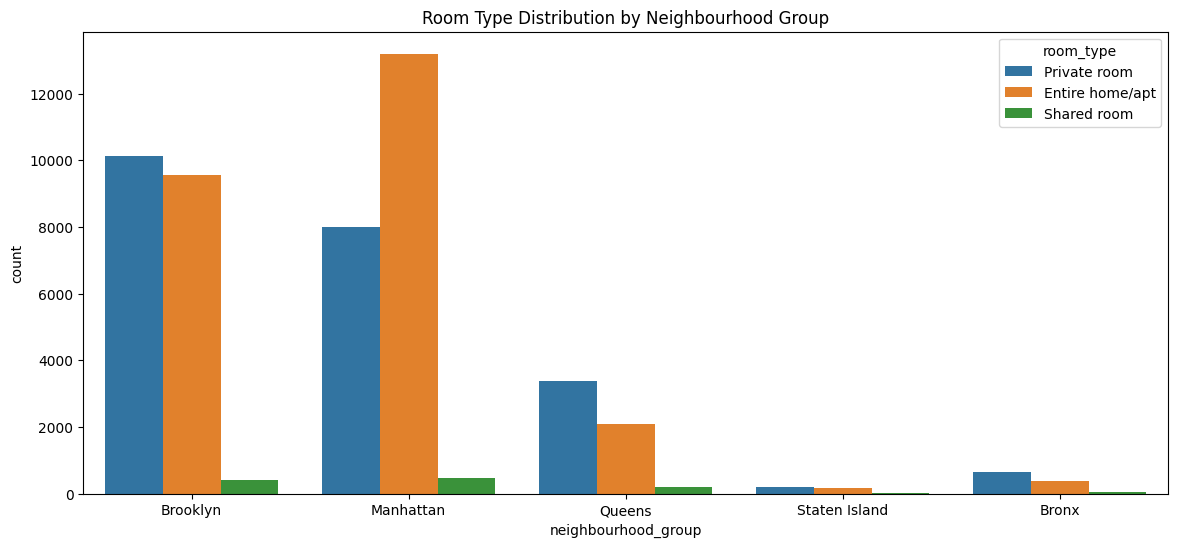

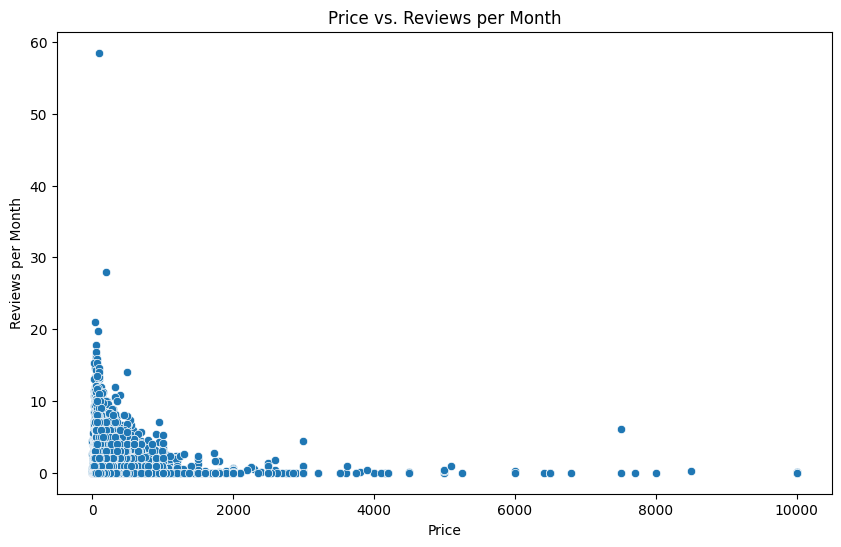

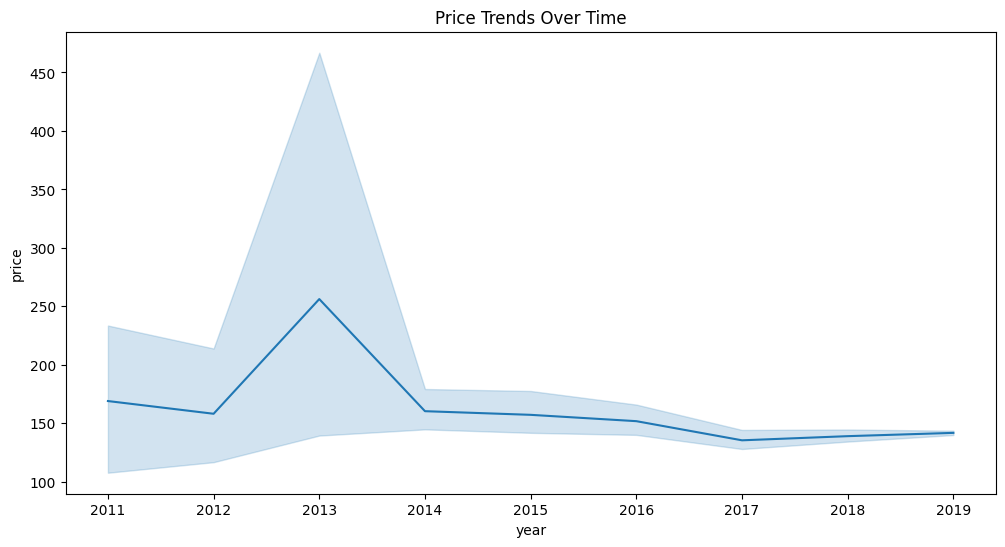

In [39]:
# price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.show()

# distribution of listings across different neighbourhood groups
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Number of Listings in Each Neighbourhood Group')
plt.show()

# distribution of availability across all listings
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title('Distribution of Availability')
plt.xlabel('Availability in Days')
plt.ylabel('Frequency')
plt.show()

# distribution of the 'reviews_per_month' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=30, kde=True)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.show()

# scatter plot of the listings based on latitude and longitude to visualize the geographical distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=20)
plt.title('Geographical Distribution of Listings')
plt.show()

# average price of listings in each neighbourhood group
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, ci=None)
plt.title('Average Price by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

# distribution and statistics of the 'minimum_nights' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

# distribution of room types within each neighbourhood group
plt.figure(figsize=(14, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title('Room Type Distribution by Neighbourhood Group')
plt.show()

# relationship between the price of a listing and the number of reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews_per_month', data=df)
plt.title('Price vs. Reviews per Month')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.show()

# Price Trends Over Time
df['last_review'] = pd.to_datetime(df['last_review'])
df['year'] = df['last_review'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=df)
plt.title('Price Trends Over Time')
plt.show()




